In [1]:
from modules.helper import *
import modules.lyapunov as lyp
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

tolerence = 1e-1
imagefolder = 'images/'

In [2]:
import modules.main as main
import time

In [3]:
start = time.time()
l1,l2 = main.main()
print(f'Total run time:\t{time.time()-start:.2f}')

Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.63 seconds to run
1/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done i

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.65 seconds to run
11/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobia

/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:45: RuntimeWarning: overflow encountered in power
  z1 = (1-self.l+self.l*np.abs(z)**self.a)*((z)/(np.abs(z)))**2 + 1
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:43: RuntimeWarning: invalid value encountered in multiply
  z = self.x + self.y*1j
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:45: RuntimeWarning: invalid value encountered in true_divide
  z1 = (1-self.l+self.l*np.abs(z)**self.a)*((z)/(np.abs(z)))**2 + 1


20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating


/home/jelleymuncher/anaconda3/envs/chaos/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.71 seconds to run
17/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.30 seconds to run
18/

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 13.12 seconds to run
28/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 1

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.83 seconds to run
38/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobi

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.27 seconds to run
48/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.66 seconds to run
49/

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.46 seconds to run
59/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done 

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 11.03 seconds to run
69/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.75 seconds to run
79/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.65 seconds to run
80

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.23 seconds to run
90/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.94 seconds to run
100/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 13.02 seconds to run
110/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 11.09 seconds to run
1

/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: overflow encountered in square
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: invalid value encountered in multiply
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: invalid value encountered in subtract
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: invalid value encountered in true_divide
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/

System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.95 seconds to run
112/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done 

90% done iterating
This took 10.23 seconds to run
122/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.67 seconds to run
123/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% don

80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.41 seconds to run
133/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done

Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 11.06 seconds to run
143/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done

50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.75 seconds to run
153/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.74 seconds to run
154/400
Iterating over the transient of 10000 steps
10% done iterating
20% do

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.28 seconds to run
164/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% don

60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.93 seconds to run
174/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 13.02 seconds to run
184/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 11.03 seconds to run
1

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.71 seconds to run
195/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% don

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.65 seconds to run
205/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.41 seconds to run
215/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.93 seconds to run
216

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 13.07 seconds to run
226/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.63 seconds to run
236/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacob

System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.25 seconds to run
246/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done 

90% done iterating
This took 9.97 seconds to run
256/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.42 seconds to run
257/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done

90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 11.11 seconds to run
267/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% don

Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.73 seconds to run
277/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done

50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.58 seconds to run
287/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.95 seconds to run
288/400
Iterating over the transient of 10000 steps
10% done iterating
20% done

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.92 seconds to run
298/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done

60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.62 seconds to run
308/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapuno

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.64 seconds to run
318/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.70 seconds to run
3

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.40 seconds to run
329/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.38 seconds to run
339/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.76 seconds to run
349/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.68 seconds to run
3

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.67 seconds to run
360/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% don

40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.97 seconds to run
370/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up

10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 9.97 seconds to run
380/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 11.09 seconds to run
38

20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.74 seconds to run
391/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% don

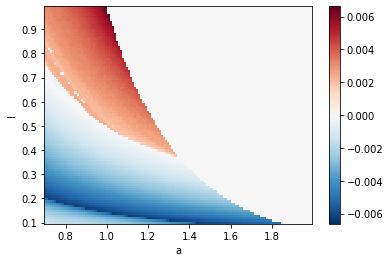

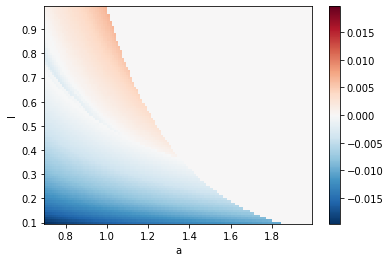

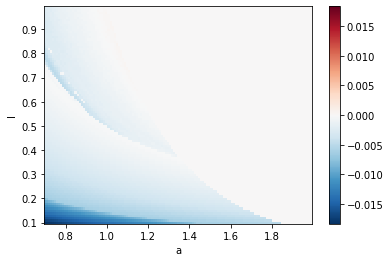

In [30]:
plt.figure()
plt.title('Mean first Lyapunov Exponent')
l1.mean(axis=(0,1)).plot()
plt.show()

plt.figure()
l2.mean(axis=(0,1)).plot()
plt.show()

plt.figure()
(l2-l1).mean(axis=(0,1)).plot()
plt.show()

In [10]:
l1.to_netcdf('data/lyapunov1.nc')
l2.to_netcdf('data/lyapunov2.nc')